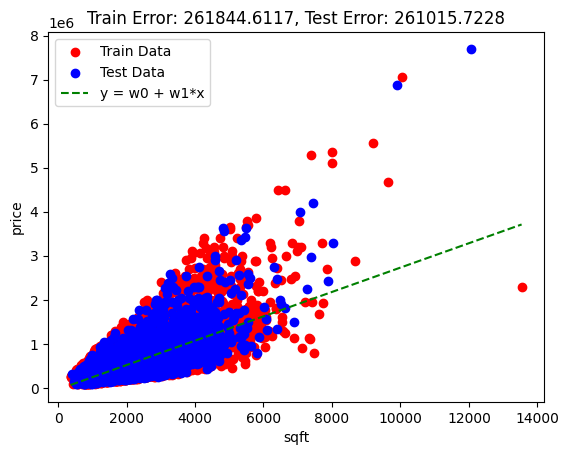

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("house_prices_data.csv")

def y(x,w0,w1):
    return w0 + w1*x

def mse(x,t,w0,w1):
     return sum((t-y(x,w0,w1))**2)/len(t)

def linRegND(data, t_colname, x_colname1, x_colname2 = None):

    x = None
    if x_colname2:
        x = data[x_colname1, x_colname2].values
    else:
        x = data[x_colname1].values

    t = data[t_colname].values

    x_err = []
    t_err = []

    for i in range(30):

        x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25)

        x_train_avg = np.mean(x_train)
        t_train_avg = np.mean(t_train)

        w1 = np.sum((x_train - x_train_avg) * (t_train - t_train_avg)) / np.sum((x_train - x_train_avg)**2)
        w0 = t_train_avg - w1*x_train_avg

        train_err= np.sqrt(mse(x_train,t_train,w0,w1))
        test_err = np.sqrt(mse(x_test,t_test,w0,w1))

        x_err.append(train_err)
        t_err.append(test_err)
    
    x_err = np.mean(x_err)
    t_err = np.mean(t_err)

    return [w0, w1, x_train, x_test, t_train, t_test, x_err, t_err]

# Full Training

w0, w1, x_train, x_test, t_train, t_test, train_err, test_err = linRegND(data, 'price', 'sqft')

plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {train_err:.4f}, Test Error: {test_err:.4f}")
plt.xlabel('sqft')
plt.ylabel('price')
plt.plot([np.min(x_train),np.max(x_train)],[y(np.min(x_train),w0,w1), y(np.max(x_train),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

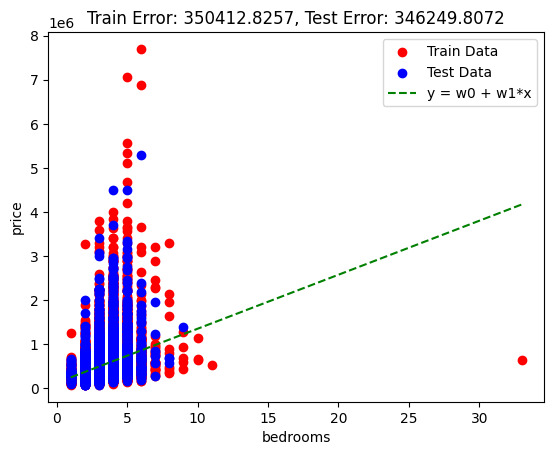

In [31]:
w0, w1, x_train, x_test, t_train, t_test, train_err, test_err = linRegND(data, 'price', 'bedrooms')

plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {train_err:.4f}, Test Error: {test_err:.4f}")
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.plot([np.min(x_train),np.max(x_train)],[y(np.min(x_train),w0,w1), y(np.max(x_train),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

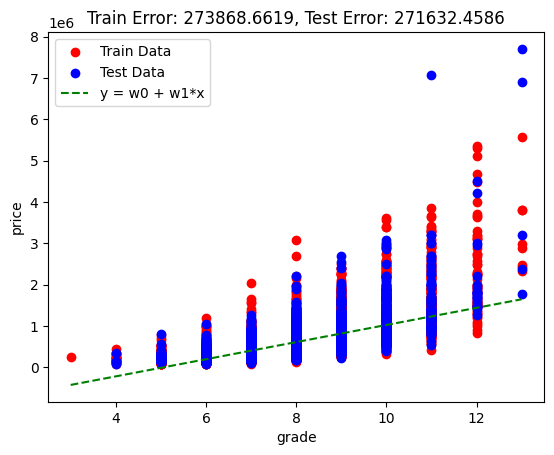

In [32]:
w0, w1, x_train, x_test, t_train, t_test, train_err, test_err = linRegND(data, 'price', 'grade')

plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {train_err:.4f}, Test Error: {test_err:.4f}")
plt.xlabel('grade')
plt.ylabel('price')
plt.plot([np.min(x_train),np.max(x_test)],[y(np.min(x_train),w0,w1), y(np.max(x_test),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

In [39]:
x = np.ones((len(data), 3))
x[:,1] = data['bedrooms'].values
x[:,2] = data['sqft'].values

t = np.matrix(data['price'].values).T

x_err = []
t_err = []

for i in range(30):
    x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25)
    w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ t_train
    x_err.append(np.sqrt(((t_train - x_train @ w).T/len(t_train)) @ (t_train - x_train @ w)))
    t_err.append(np.sqrt(((t_test - x_test @ w).T/len(t_test)) @ (t_test - x_test @ w)))

print(f'Matrix Calculated Train Error: {np.mean(x_err)}')
print(f'Matrix Calculated Test Error: {np.mean(t_err)}')

Matrix Calculated Train Error: 257602.1757191605
Matrix Calculated Test Error: 259104.5481140484


In [41]:
x = np.ones((len(data), 3))
x[:,1] = data['grade'].values
x[:,2] = data['sqft'].values

t = np.matrix(data['price'].values).T

x_err = []
t_err = []

for i in range(30):
    x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25)
    w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ t_train
    x_err.append(np.sqrt(((t_train - x_train @ w).T/len(t_train)) @ (t_train - x_train @ w)))
    t_err.append(np.sqrt(((t_test - x_test @ w).T/len(t_test)) @ (t_test - x_test @ w)))

print(f'Matrix Calculated Train Error: {np.mean(x_err)}')
print(f'Matrix Calculated Test Error: {np.mean(t_err)}')

Matrix Calculated Train Error: 250506.74594368675
Matrix Calculated Test Error: 250685.0233380012


In [43]:
x = np.ones((len(data), 3))
x[:,1] = data['bedrooms'].values
x[:,2] = data['grade'].values

t = np.matrix(data['price'].values).T

x_err = []
t_err = []

for i in range(30):
    x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25)
    w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ t_train
    x_err.append(np.sqrt(((t_train - x_train @ w).T/len(t_train)) @ (t_train - x_train @ w)))
    t_err.append(np.sqrt(((t_test - x_test @ w).T/len(t_test)) @ (t_test - x_test @ w)))

print(f'Matrix Calculated Train Error: {np.mean(x_err)}')
print(f'Matrix Calculated Test Error: {np.mean(t_err)}')

Matrix Calculated Train Error: 272531.117256541
Matrix Calculated Test Error: 270042.3251395633


In [45]:
x = np.ones((len(data), 4))
x[:,1] = data['bedrooms'].values
x[:,2] = data['grade'].values
x[:,3] = data['sqft'].values

t = np.matrix(data['price'].values).T

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25)
w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ t_train

print(f'w0: {w[0]}')
print(f'w1: {w[1]}')
print(f'w2: {w[2]}')
print(f'w3: {w[3]}')

w0: [[-481944.75614139]]
w1: [[-42851.77048597]]
w2: [[93287.84574267]]
w3: [[218.18930231]]


In [48]:
x = np.ones((len(data), 4))
x[:,1] = data['bedrooms'].values
x[:,2] = data['grade'].values
x[:,3] = data['sqft'].values

t = np.matrix(data['price'].values).T

w = np.linalg.inv(x.T @ x) @ x.T @ t

print(f'w0: {w[0]}')
print(f'w1: {w[1]}')
print(f'w2: {w[2]}')
print(f'w3: {w[3]}')

w0: [[-471369.15120823]]
w1: [[-42980.61541471]]
w2: [[92394.88884154]]
w3: [[215.87798489]]


In [52]:
encoder = OneHotEncoder()
grade_encoded = encoder.fit_transform(data[['grade']]).toarray()
x_numeric = data[['bedrooms', 'sqft']].values
x = np.hstack((np.ones((len(x_numeric), 1)), x_numeric, grade_encoded))

t = np.matrix(data['price'].values).T

w = np.linalg.inv(x.T @ x) @ x.T @ t

print(f'w0: {w[0]}')
print(f'w1: {w[1]}')
print(f'w2: {w[3:].flatten()}')
print(f'w3: {w[2]}')

w0: [[-614917.93096924]]
w1: [[-41336.57635073]]
w2: [[ 843255.3729248   976191.04815674  523069.55377197  610995.1831665
   559658.40246582  719589.55493164  888611.57012939 1303408.57262894
  1647753.7411499  1501720.47155762 2974626.06722842]]
w3: [[85.58764502]]
